In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [13]:
dataset = pd.read_csv('/mnt/c/Users/paart/Documents/Machine Learning/Breast Cancer/data/data.csv')
dataset = dataset.iloc[:, 1:-1]
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
diagnosis_unique, diagnosis_count = np.unique(dataset['diagnosis'].values, return_counts = True)

In [15]:
dataset['diagnosis'] = LabelEncoder().fit_transform(dataset['diagnosis'])

In [16]:
dataset_matrix = dataset.values
dataset_matrix[:, 0] = LabelEncoder().fit_transform(dataset_matrix[:, 0])
label_matrix = dataset_matrix[:, 0]
dataset_matrix = dataset_matrix[:, 1:]

normalize_dataset_matrix = Normalizer().fit_transform(dataset_matrix)
std_normalize_dataset = StandardScaler().fit_transform(normalize_dataset_matrix)

Below I will create 4 types of Neural Networks:

1. 3 Hidden layers, all RELU as activation functions except softmax for last one, cross entropy for cost function, adaptive plus square root optimization stochastic gradient descent
2. 3 Hidden layers, dropout with 0.5, l2 norm, all RELU as activation functions except softmax for last one, cross entropy for cost function, adaptive plus square root optimization stochastic gradient descent
3. 3 Hidden layers, dropout with 0.5, l2 norm, batch normalization, all RELU as activation functions except softmax for last one, cross entropy for cost function, adaptive plus square root optimization stochastic gradient descent4. 3 Hidden layers, batch normalization, all RELU as activation functions except softmax for last one, cross entropy for cost function, adaptive plus square root optimization stochastic gradient descent

In [17]:
class first_network:
    def __init__(self, learning_rate, x_shape, y_shape):
        self.X = tf.placeholder("float", [None, x_shape])
        self.Y = tf.placeholder("float", [None, y_shape])
        
        hidden1 = tf.Variable(tf.random_normal([x_shape, 512]))
        hidden2 = tf.Variable(tf.random_normal([512, 256]))
        hidden3 = tf.Variable(tf.random_normal([256, 128]))
        output = tf.Variable(tf.random_normal([128, y_shape]))

        hidden_bias1 = tf.Variable(tf.random_normal([512], stddev = 0.1))
        hidden_bias2 = tf.Variable(tf.random_normal([256], stddev = 0.1))
        hidden_bias3 = tf.Variable(tf.random_normal([128], stddev = 0.1))
        output_bias = tf.Variable(tf.random_normal([y_shape], stddev = 0.1))
        
        feedforward1 = tf.nn.relu(tf.matmul(self.X, hidden1) + hidden_bias1)
        feedforward2 = tf.nn.relu(tf.matmul(feedforward1, hidden2) + hidden_bias2)
        feedforward3 = tf.nn.relu(tf.matmul(feedforward2, hidden3) + hidden_bias3)
        
        self.logits = tf.matmul(feedforward3, output) + output_bias
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = self.Y, logits = self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(self.cost)
        
        correct_pred = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

class second_network:
    def __init__(self, learning_rate, x_shape, y_shape, beta = 0.00005):
        self.X = tf.placeholder("float", [None, x_shape])
        self.Y = tf.placeholder("float", [None, y_shape])
        
        hidden1 = tf.Variable(tf.random_normal([x_shape, 512]))
        hidden2 = tf.Variable(tf.random_normal([512, 256]))
        hidden3 = tf.Variable(tf.random_normal([256, 128]))
        output = tf.Variable(tf.random_normal([128, y_shape]))

        hidden_bias1 = tf.Variable(tf.random_normal([512], stddev = 0.1))
        hidden_bias2 = tf.Variable(tf.random_normal([256], stddev = 0.1))
        hidden_bias3 = tf.Variable(tf.random_normal([128], stddev = 0.1))
        output_bias = tf.Variable(tf.random_normal([y_shape], stddev = 0.1))
        
        feedforward1 = tf.nn.dropout(tf.nn.relu(tf.matmul(self.X, hidden1) + hidden_bias1), 0.5)
        feedforward2 = tf.nn.dropout(tf.nn.relu(tf.matmul(feedforward1, hidden2) + hidden_bias2), 0.5)
        feedforward3 = tf.nn.dropout(tf.nn.relu(tf.matmul(feedforward2, hidden3) + hidden_bias3), 0.5)
        
        self.logits = tf.matmul(feedforward3, output) + output_bias
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = self.Y, logits = self.logits))
        self.cost += tf.nn.l2_loss(hidden1) * beta + tf.nn.l2_loss(hidden2) * beta + tf.nn.l2_loss(hidden3) * beta + tf.nn.l2_loss(output) * beta
        self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(self.cost)
        
        correct_pred = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        
class third_network:
    def __init__(self, learning_rate, x_shape, y_shape, beta = 0.00005):
        self.X = tf.placeholder("float", [None, x_shape])
        self.Y = tf.placeholder("float", [None, y_shape])
        
        hidden1 = tf.Variable(tf.random_normal([x_shape, 512]))
        hidden2 = tf.Variable(tf.random_normal([512, 256]))
        hidden3 = tf.Variable(tf.random_normal([256, 128]))
        output = tf.Variable(tf.random_normal([128, y_shape]))

        hidden_bias1 = tf.Variable(tf.random_normal([512], stddev = 0.1))
        hidden_bias2 = tf.Variable(tf.random_normal([256], stddev = 0.1))
        hidden_bias3 = tf.Variable(tf.random_normal([128], stddev = 0.1))
        output_bias = tf.Variable(tf.random_normal([y_shape], stddev = 0.1))
        
        feedforward1 = tf.nn.relu(tf.matmul(self.X, hidden1) + hidden_bias1)
        feedforward1 = tf.nn.dropout(tf.layers.batch_normalization(feedforward1), 0.5)
        feedforward2 = tf.nn.relu(tf.matmul(feedforward1, hidden2) + hidden_bias2)
        feedforward2 = tf.nn.dropout(tf.layers.batch_normalization(feedforward2), 0.5)
        feedforward3 = tf.nn.relu(tf.matmul(feedforward2, hidden3) + hidden_bias3)
        feedforward3 = tf.nn.dropout(tf.layers.batch_normalization(feedforward3), 0.5)
        
        self.logits = tf.matmul(feedforward3, output) + output_bias
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = self.Y, logits = self.logits))
        self.cost += tf.nn.l2_loss(hidden1) * beta + tf.nn.l2_loss(hidden2) * beta + tf.nn.l2_loss(hidden3) * beta + tf.nn.l2_loss(output) * beta
        self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(self.cost)
        
        correct_pred = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

class fourth_network:
    def __init__(self, learning_rate, x_shape, y_shape, beta = 0.00005):
        self.X = tf.placeholder("float", [None, x_shape])
        self.Y = tf.placeholder("float", [None, y_shape])
        
        hidden1 = tf.Variable(tf.random_normal([x_shape, 512]))
        hidden2 = tf.Variable(tf.random_normal([512, 256]))
        hidden3 = tf.Variable(tf.random_normal([256, 128]))
        output = tf.Variable(tf.random_normal([128, y_shape]))

        hidden_bias1 = tf.Variable(tf.random_normal([512], stddev = 0.1))
        hidden_bias2 = tf.Variable(tf.random_normal([256], stddev = 0.1))
        hidden_bias3 = tf.Variable(tf.random_normal([128], stddev = 0.1))
        output_bias = tf.Variable(tf.random_normal([y_shape], stddev = 0.1))
        
        feedforward1 = tf.nn.relu(tf.matmul(self.X, hidden1) + hidden_bias1)
        feedforward1 = tf.layers.batch_normalization(feedforward1)
        feedforward2 = tf.nn.relu(tf.matmul(feedforward1, hidden2) + hidden_bias2)
        feedforward2 = tf.layers.batch_normalization(feedforward2)
        feedforward3 = tf.nn.relu(tf.matmul(feedforward2, hidden3) + hidden_bias3)
        feedforward3 = tf.layers.batch_normalization(feedforward3)
        
        self.logits = tf.matmul(feedforward3, output) + output_bias
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = self.Y, logits = self.logits))
        self.cost += tf.nn.l2_loss(hidden1) * beta + tf.nn.l2_loss(hidden2) * beta + tf.nn.l2_loss(hidden3) * beta + tf.nn.l2_loss(output) * beta
        self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(self.cost)
        
        correct_pred = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [18]:
def train(model, x_train, y_train, x_test, y_test, epoch, batch):
    LOST, ACC_TRAIN, ACC_TEST = [], [], []
    for i in range(epoch):
        loss, acc_train = 0, 0
        for n in range(0, (x_train.shape[0] // batch) * batch, batch):
            onehot = np.zeros((batch, np.unique(y_train).shape[0]))
            
            # change to one-hot for cross entropy
            for k in range(batch):
                onehot[k, int(y_train[n + k])] = 1.0
            
            cost, _ = sess.run([model.cost, model.optimizer], feed_dict = {model.X : x_train[n: n + batch, :], model.Y : onehot})
            acc_train += sess.run(model.accuracy, feed_dict = {model.X : x_train[n: n + batch, :], model.Y : onehot})
            loss += cost
            
        loss /= (x_train.shape[0] // batch)
        acc_train /= (x_train.shape[0] // batch)
        LOST.append(loss); ACC_TRAIN.append(acc_train)
        
        print ('epoch: ', i + 1, ', loss: ', loss, ', accuracy: ', acc_train)
        
        onehot = np.zeros((y_test.shape[0], np.unique(y_test).shape[0]))
        
        # change to one-hot for cross entropy
        for k in range(y_test.shape[0]):
            onehot[k, int(y_test[k])] = 1.0
            
        testing_acc, logits = sess.run([model.accuracy, tf.cast(tf.argmax(model.logits, 1), tf.int32)], feed_dict = {model.X : x_test, model.Y : onehot})
        
        print ('testing accuracy: ', testing_acc)
        print (metrics.classification_report(y_test, logits, target_names = diagnosis_unique))
        
        ACC_TEST.append(testing_acc)
        
    plt.subplot(1, 2, 1)
    x_component = [i for i in range(len(LOST))]
    plt.plot(x_component, LOST)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.subplot(1, 2, 2)
    plt.plot(x_component, ACC_TRAIN, label = 'train accuracy')
    plt.plot(x_component, ACC_TEST, label = 'test accuracy')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

We will try to the model with default dataset, no normalization applied

In [19]:
EPOCH = 10
BATCH = 32
LEARNING_RATE = 0.001

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset_matrix, label_matrix, test_size = 0.2)

UN-NORMALIZED DATASET:

First Model:

epoch:  1 , loss:  28919.3842076 , accuracy:  0.803571428571
testing accuracy:  0.885965
             precision    recall  f1-score   support

          B       0.89      0.93      0.91        73
          M       0.87      0.80      0.84        41

avg / total       0.89      0.89      0.88       114

epoch:  2 , loss:  10232.3920201 , accuracy:  0.901785714286
testing accuracy:  0.877193
             precision    recall  f1-score   support

          B       0.90      0.90      0.90        73
          M       0.83      0.83      0.83        41

avg / total       0.88      0.88      0.88       114

epoch:  3 , loss:  11123.8419364 , accuracy:  0.897321428571
testing accuracy:  0.877193
             precision    recall  f1-score   support

          B       0.88      0.93      0.91        73
          M       0.86      0.78      0.82        41

avg / total       0.88      0.88      0.88       114

epoch:  4 , loss:  8699.66190011 , accuracy:  0.90625
testing accuracy:  0.877193
      

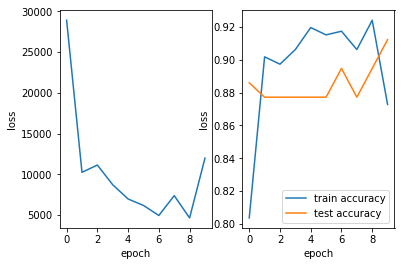

In [20]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = first_network(LEARNING_RATE, X_train.shape[1], diagnosis_unique.shape[0])
sess.run(tf.global_variables_initializer())
train(model, X_train, Y_train, X_test, Y_test, EPOCH, BATCH)

This is a good learning curve.

Second Model:

epoch:  1 , loss:  1970627.94643 , accuracy:  0.439732142857
testing accuracy:  0.482456
             precision    recall  f1-score   support

          B       0.67      0.38      0.49        73
          M       0.38      0.66      0.48        41

avg / total       0.56      0.48      0.48       114

epoch:  2 , loss:  1959875.65179 , accuracy:  0.488839285714
testing accuracy:  0.5
             precision    recall  f1-score   support

          B       0.68      0.41      0.51        73
          M       0.39      0.66      0.49        41

avg / total       0.58      0.50      0.50       114

epoch:  3 , loss:  1985809.8125 , accuracy:  0.435267857143
testing accuracy:  0.464912
             precision    recall  f1-score   support

          B       0.62      0.41      0.50        73
          M       0.35      0.56      0.43        41

avg / total       0.53      0.46      0.47       114

epoch:  4 , loss:  1644756.09821 , accuracy:  0.475446428571
testing accuracy:  0.508772
     

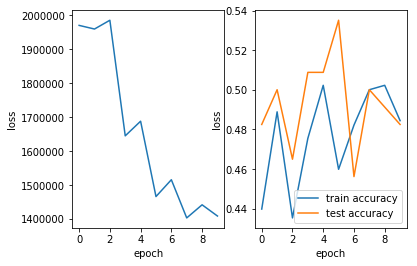

In [21]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = second_network(LEARNING_RATE, X_train.shape[1], diagnosis_unique.shape[0])
sess.run(tf.global_variables_initializer())
train(model, X_train, Y_train, X_test, Y_test, EPOCH, BATCH)

This is not good. This is caused by the dropout and penalty L2 square root. This causes a sharp decline in accuracy.

Third Model:

epoch:  1 , loss:  2271964.49107 , accuracy:  0.524553571429
testing accuracy:  0.473684
             precision    recall  f1-score   support

          B       0.60      0.52      0.56        73
          M       0.31      0.39      0.35        41

avg / total       0.50      0.47      0.48       114

epoch:  2 , loss:  1724842.53125 , accuracy:  0.5
testing accuracy:  0.491228
             precision    recall  f1-score   support

          B       0.66      0.42      0.52        73
          M       0.37      0.61      0.46        41

avg / total       0.56      0.49      0.50       114

epoch:  3 , loss:  1756521.625 , accuracy:  0.502232142857
testing accuracy:  0.526316
             precision    recall  f1-score   support

          B       0.70      0.45      0.55        73
          M       0.40      0.66      0.50        41

avg / total       0.59      0.53      0.53       114

epoch:  4 , loss:  1709993.5 , accuracy:  0.5
testing accuracy:  0.45614
             precision    re

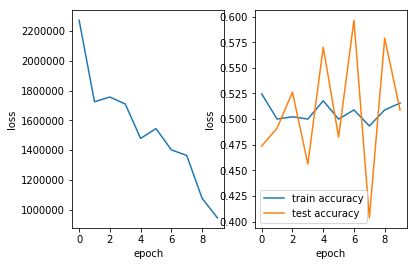

In [22]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = third_network(LEARNING_RATE, X_train.shape[1], diagnosis_unique.shape[0])
sess.run(tf.global_variables_initializer())
train(model, X_train, Y_train, X_test, Y_test, EPOCH, BATCH)

Dropping out does not seem like a good idea.

NORAMLIZED DATASET:

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(normalize_dataset_matrix, label_matrix, test_size = 0.2)

First Model:

epoch:  1 , loss:  580.276849474 , accuracy:  0.553571428571
testing accuracy:  0.605263
             precision    recall  f1-score   support

          B       0.61      1.00      0.75        69
          M       0.00      0.00      0.00        45

avg / total       0.37      0.61      0.46       114

epoch:  2 , loss:  121.642730645 , accuracy:  0.627232142857
testing accuracy:  0.850877
             precision    recall  f1-score   support

          B       0.81      0.99      0.89        69
          M       0.97      0.64      0.77        45

avg / total       0.87      0.85      0.84       114

epoch:  3 , loss:  28.7711894172 , accuracy:  0.794642857143
testing accuracy:  0.815789
             precision    recall  f1-score   support

          B       0.91      0.77      0.83        69
          M       0.71      0.89      0.79        45

avg / total       0.84      0.82      0.82       114

epoch:  4 , loss:  14.3460772378 , accuracy:  0.886160714286
testing accuracy:  0.815789

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


epoch:  6 , loss:  9.03560749122 , accuracy:  0.912946428571
testing accuracy:  0.877193
             precision    recall  f1-score   support

          B       0.86      0.96      0.90        69
          M       0.92      0.76      0.83        45

avg / total       0.88      0.88      0.87       114

epoch:  7 , loss:  9.00319452797 , accuracy:  0.915178571429
testing accuracy:  0.868421
             precision    recall  f1-score   support

          B       0.88      0.91      0.89        69
          M       0.86      0.80      0.83        45

avg / total       0.87      0.87      0.87       114

epoch:  8 , loss:  7.49051171541 , accuracy:  0.917410714286
testing accuracy:  0.885965
             precision    recall  f1-score   support

          B       0.87      0.96      0.91        69
          M       0.92      0.78      0.84        45

avg / total       0.89      0.89      0.88       114

epoch:  9 , loss:  6.77682449136 , accuracy:  0.917410714286
testing accuracy:  0.877193

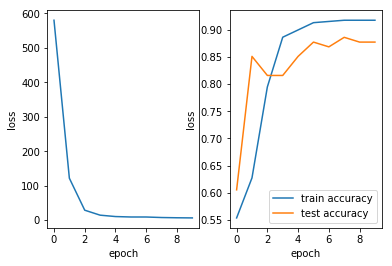

In [24]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = first_network(LEARNING_RATE, X_train.shape[1], diagnosis_unique.shape[0])
sess.run(tf.global_variables_initializer())
train(model, X_train, Y_train, X_test, Y_test, EPOCH, BATCH)

A little better than before.

Second Model:

epoch:  1 , loss:  2638.06363351 , accuracy:  0.479910714286
testing accuracy:  0.438596
             precision    recall  f1-score   support

          B       0.55      0.42      0.48        69
          M       0.34      0.47      0.40        45

avg / total       0.47      0.44      0.44       114

epoch:  2 , loss:  1868.05055455 , accuracy:  0.544642857143
testing accuracy:  0.570175
             precision    recall  f1-score   support

          B       0.63      0.70      0.66        69
          M       0.45      0.38      0.41        45

avg / total       0.56      0.57      0.56       114

epoch:  3 , loss:  1771.73422677 , accuracy:  0.533482142857
testing accuracy:  0.535088
             precision    recall  f1-score   support

          B       0.63      0.55      0.59        69
          M       0.43      0.51      0.46        45

avg / total       0.55      0.54      0.54       114

epoch:  4 , loss:  1548.46589443 , accuracy:  0.540178571429
testing accuracy:  0.508772

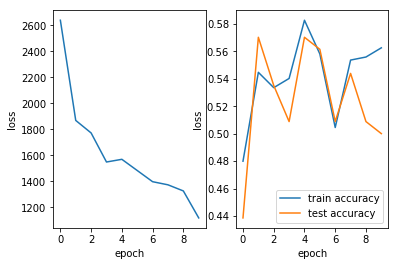

In [25]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = second_network(LEARNING_RATE, X_train.shape[1], diagnosis_unique.shape[0])
sess.run(tf.global_variables_initializer())
train(model, X_train, Y_train, X_test, Y_test, EPOCH, BATCH)

Almost as bad as un-normalized dataset.

Third Model:

epoch:  1 , loss:  1947.94789342 , accuracy:  0.520089285714
testing accuracy:  0.482456
             precision    recall  f1-score   support

          B       0.57      0.61      0.59        69
          M       0.33      0.29      0.31        45

avg / total       0.47      0.48      0.48       114

epoch:  2 , loss:  1680.38741629 , accuracy:  0.571428571429
testing accuracy:  0.508772
             precision    recall  f1-score   support

          B       0.58      0.68      0.63        69
          M       0.33      0.24      0.28        45

avg / total       0.48      0.51      0.49       114

epoch:  3 , loss:  1388.97154454 , accuracy:  0.573660714286
testing accuracy:  0.535088
             precision    recall  f1-score   support

          B       0.61      0.62      0.62        69
          M       0.41      0.40      0.40        45

avg / total       0.53      0.54      0.53       114

epoch:  4 , loss:  1657.98140172 , accuracy:  0.549107142857
testing accuracy:  0.561404

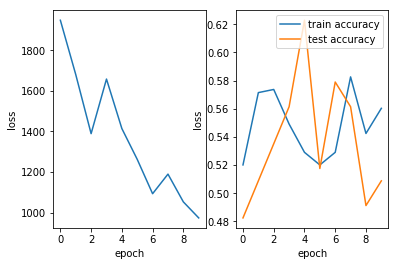

In [26]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = third_network(LEARNING_RATE, X_train.shape[1], diagnosis_unique.shape[0])
sess.run(tf.global_variables_initializer())
train(model, X_train, Y_train, X_test, Y_test, EPOCH, BATCH)

About the same as un-normalized dataset.

epoch:  1 , loss:  85.8011988231 , accuracy:  0.752232142857
testing accuracy:  0.850877
             precision    recall  f1-score   support

          B       0.81      0.99      0.89        69
          M       0.97      0.64      0.77        45

avg / total       0.87      0.85      0.84       114

epoch:  2 , loss:  29.5164096015 , accuracy:  0.834821428571
testing accuracy:  0.859649
             precision    recall  f1-score   support

          B       0.82      0.99      0.89        69
          M       0.97      0.67      0.79        45

avg / total       0.88      0.86      0.85       114

epoch:  3 , loss:  18.1873929841 , accuracy:  0.904017857143
testing accuracy:  0.850877
             precision    recall  f1-score   support

          B       0.80      1.00      0.89        69
          M       1.00      0.62      0.77        45

avg / total       0.88      0.85      0.84       114

epoch:  4 , loss:  15.3945818969 , accuracy:  0.917410714286
testing accuracy:  0.868421

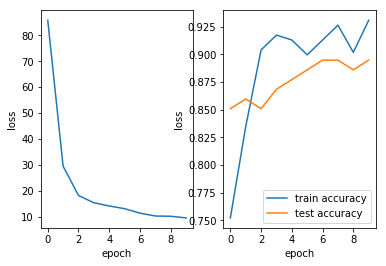

In [27]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = fourth_network(LEARNING_RATE, X_train.shape[1], diagnosis_unique.shape[0])
sess.run(tf.global_variables_initializer())
train(model, X_train, Y_train, X_test, Y_test, EPOCH, BATCH)